In [1]:
## This notebook calculates minimal percentage of wining for pair profit-risk

In [2]:
print("Begin initializing")
# initialize notebook
%load_ext autoreload
%autoreload 2

# import basic libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import trange, tqdm
from IPython.display import clear_output
import seaborn as sns
sns.set()

# setup output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.options.display.max_columns = None
pd.options.display.max_rows = None
#
import random
print("Initializing complete")


Begin initializing
Initializing complete


In [3]:
from lib.calulation.risk_calculators import find_zero_v2
zeros = []
for profit in tqdm(np.arange(0.1, 1, 0.05)):
    for risk in np.arange(0.1, 3, 0.1):
        p = round(profit / 100, 6)
        r = round(risk / 100, 6)
        z = find_zero_v2(p, r) #if p < r else 0
        zeros.append([round(profit, 4), round(risk, 4), z])
#print(zeros)

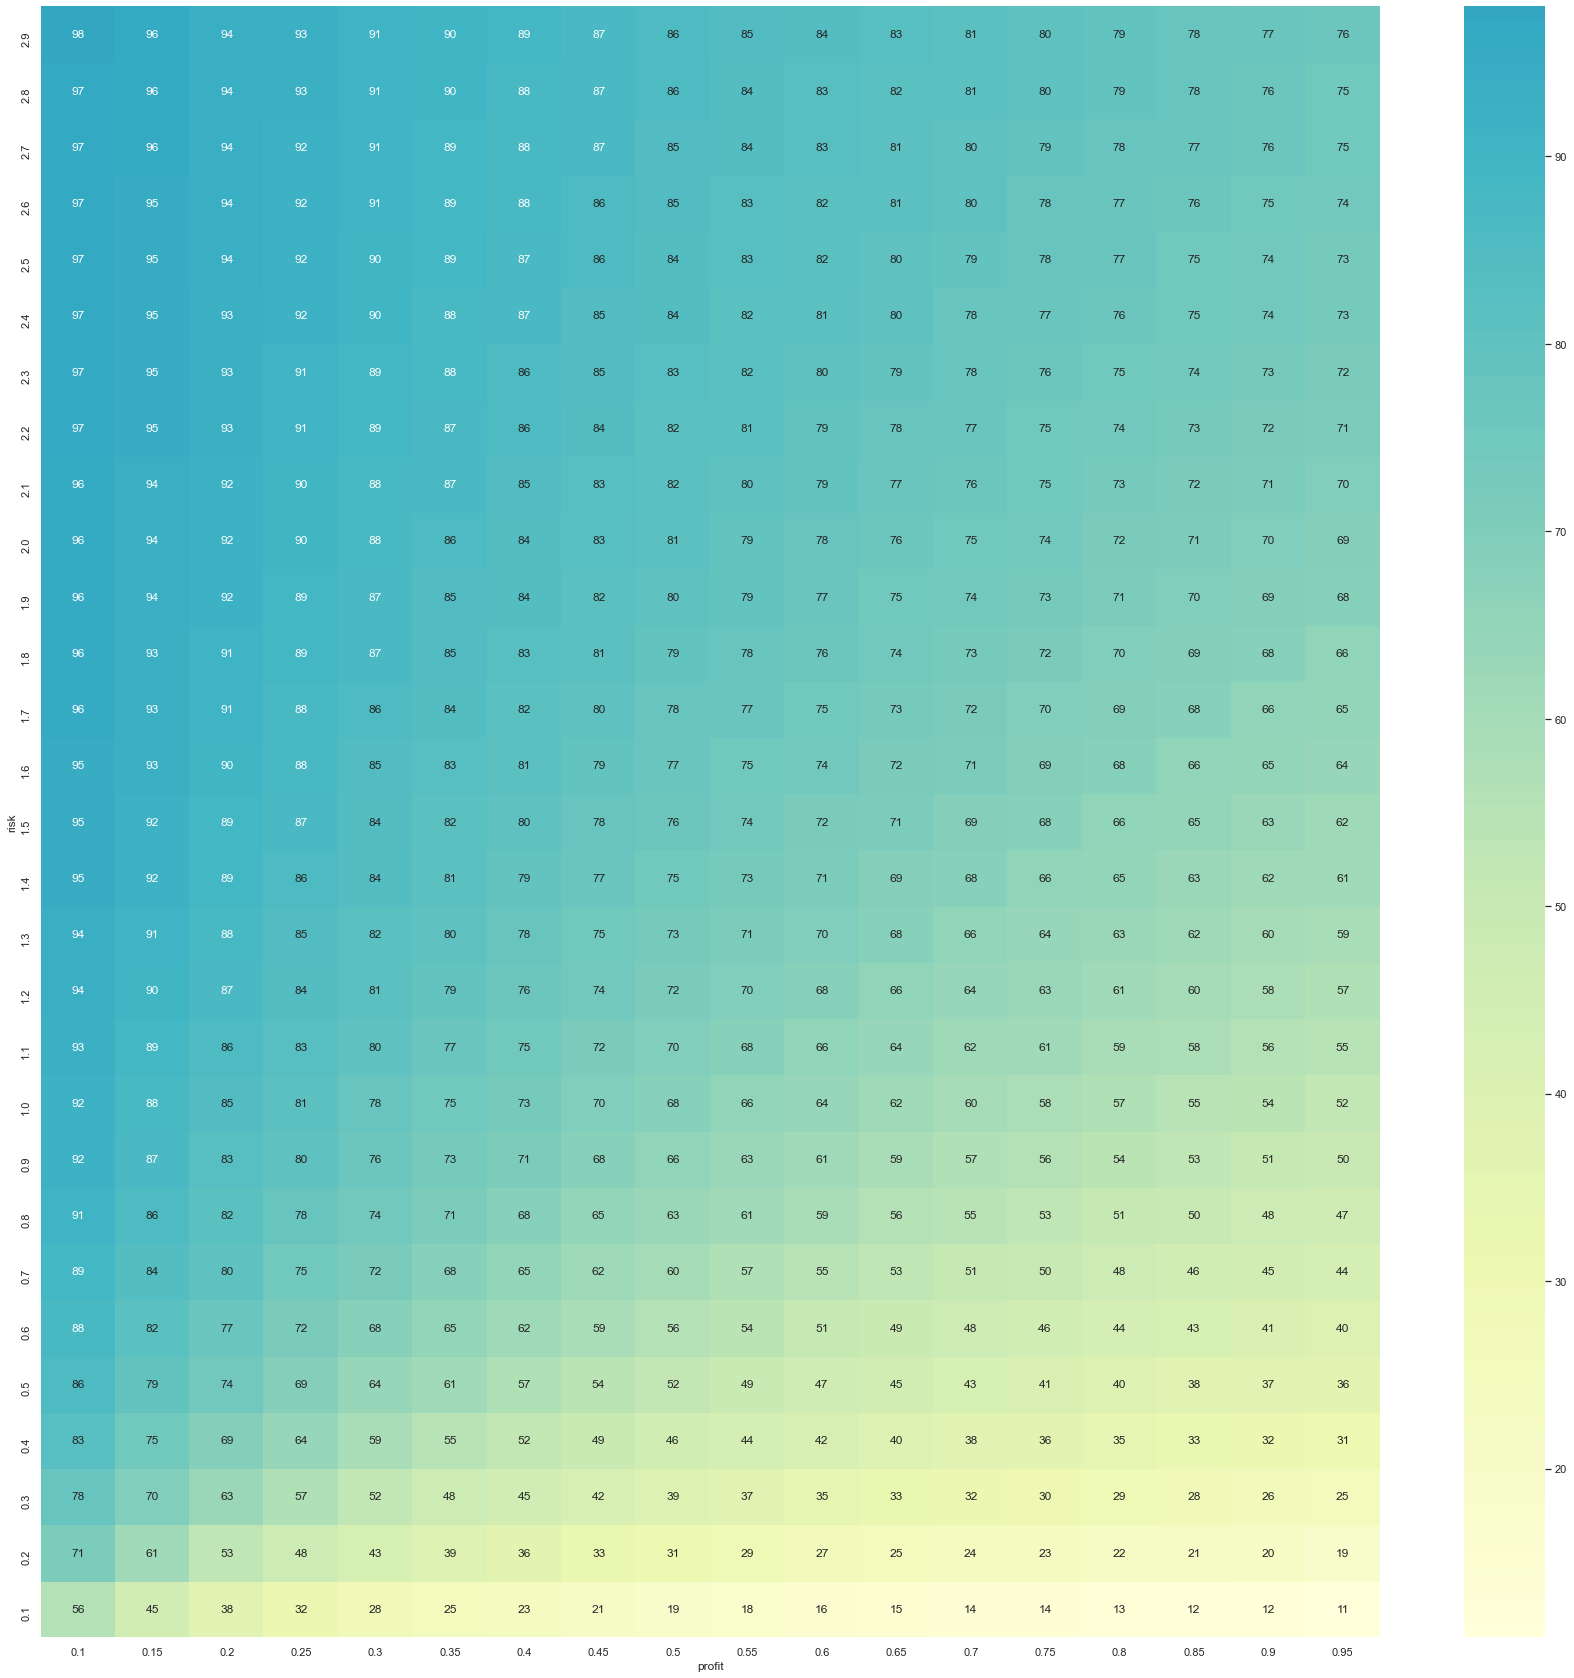

In [4]:
plt.figure(figsize = (30,30))
df = pd.DataFrame(zeros, columns=["profit","risk","zero"])
g = df.groupby(["profit", "risk"]).agg({'zero':'sum'}).reset_index()
pivotted= g.pivot('risk', 'profit', 'zero')
ax = sns.heatmap(pivotted,cmap='YlGnBu', annot=True, center=90)
ax.invert_yaxis()